In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
degrees = [0,45,90]
degrees = [90,135,180]
sinx = np.sin(np.array(degrees)*2*np.pi/360)
test_df = pd.DataFrame({"degrees": degrees,
                       "sinx": sinx})
test_df.corr(method = "pearson")

,degrees,sinx
degrees,1.000000,-0.972575
sinx,-0.972575,1.000000


    # Importing Data from the CSV file 

In [3]:
df_airlines = pd.read_csv("AIRLINE.csv")

In [11]:
df_airlines.head()

,Num_of_Passengers,Cost
0,61,4.28
1,63,4.08
2,67,4.42
3,69,4.17
4,70,4.48


In [10]:
df_airlines.columns = [ "Num_of_Passengers", "Cost"]

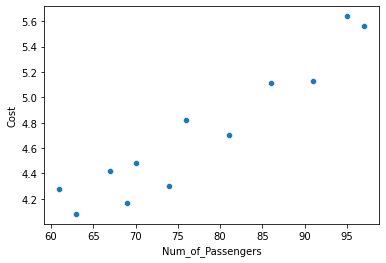

In [12]:
sns.scatterplot(data= df_airlines, x="Num_of_Passengers", y="Cost")

In [14]:
df_airlines.corr(method = "pearson")

,Num_of_Passengers,Cost
Num_of_Passengers,1.0000,0.9482
Cost,0.9482,1.0000


In [16]:
model = smf.ols(formula="Cost ~ Num_of_Passengers", data=df_airlines)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     89.09
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.69e-06
Time:                        12:27:58   Log-Likelihood:                 4.8312
No. Observations:                  12   AIC:                            -5.662
Df Residuals:                      10   BIC:                            -4.693
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5698      0.33

In [28]:
results.ssr

0.31406027235050343

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

Text(4.581711071640026, -0.28171107164002596, '5')

Text(4.052590290112494, 0.22740970988750586, '0')

Text(4.378203078744821, -0.20820307874482147, '3')

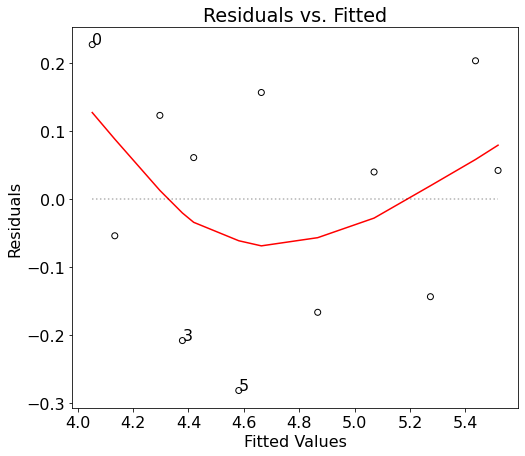

In [17]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

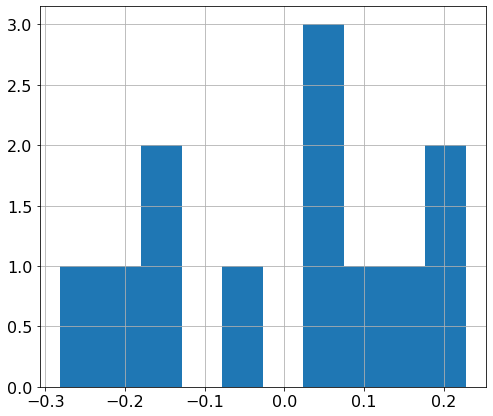

In [18]:
residuals.hist()

Text(0.5, 1.0, 'Normal Q-Q')

Text(0, 0.5, 'Standardized Residuals')

Text(0.5, 0, 'Theoretical Quantiles')

Text(-1.5881546429662674, -1.6669271920632924, '5')

Text(1.5881546429662674, 1.4763590488599896, '0')

Text(1.0981497546858916, 1.3394609724847673, '10')

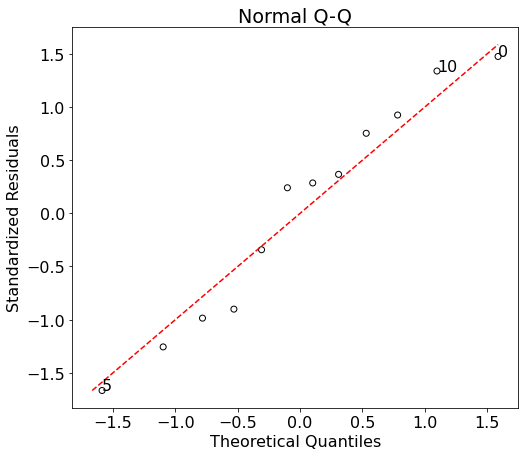

In [19]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

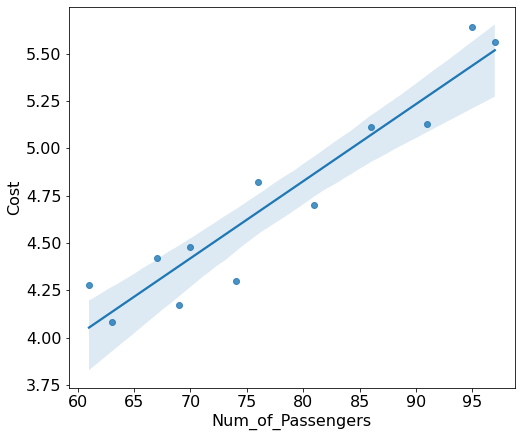

In [20]:
sns.regplot(x="Num_of_Passengers", y="Cost", data=df_airlines)

In [21]:
print(results.fittedvalues)

0     4.052590
1     4.133993
2     4.296800
3     4.378203
4     4.418905
5     4.581711
6     4.663114
7     4.866622
8     5.070130
9     5.273638
10    5.436445
11    5.517848
dtype: float64


In [23]:
print(df_airlines['Cost'])

0     4.28
1     4.08
2     4.42
3     4.17
4     4.48
5     4.30
6     4.82
7     4.70
8     5.11
9     5.13
10    5.64
11    5.56
Name: Cost, dtype: float64


In [24]:
print(df_airlines['Cost'])

0     4.28
1     4.08
2     4.42
3     4.17
4     4.48
5     4.30
6     4.82
7     4.70
8     5.11
9     5.13
10    5.64
11    5.56
Name: Cost, dtype: float64


In [25]:
X_new = pd.DataFrame({'Num_of_Passengers': [62,68,73,85,90]})

In [26]:
predictions=results.get_prediction(X_new)


In [27]:
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.093292,0.084169,3.905751,4.280833,3.656153,4.530430
1,4.337501,0.065539,4.191472,4.483531,3.916499,4.758504
2,4.541009,0.054715,4.419097,4.662922,4.127753,4.954266
3,5.029429,0.060524,4.894574,5.164284,4.612171,5.446687
4,5.232937,0.074314,5.067355,5.398518,4.804759,5.661114


In [27]:
predictions.summary_frame(alpha = 0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,226.110311,1.085994,224.141988,228.078634,219.147363,233.073260
1,228.313380,1.099070,226.321358,230.305402,221.343695,235.283065
2,230.516449,1.313895,228.135065,232.897833,223.425656,237.607242


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
X = df_airlines[['Num_of_Passengers']]
y = df_airlines['Cost']

X_train, X_test, y_train , y_test = train_test_split(X,y,train_size = 0.8, random_state = 789)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9, 1)
(9,)
(3, 1)
(3,)


In [45]:
linear_reg =LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_cost = linear_reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred_cost))
print(mean_squared_error(y_test, y_pred_cost))


LinearRegression()

0.2397603772550315
0.06026494840876336


In [47]:
print(mean_absolute_error(y_train, linear_reg.predict(X_train)))
print(mean_squared_error(y_train, linear_reg.predict(X_train)))

0.11976019447643092
0.017054006506918223


In [49]:
[linear_reg.intercept_, linear_reg.coef_]

[1.8101998683994078, array([0.03742803])]

In [50]:
linear_reg.fit(X,y)
[linear_reg.intercept_, linear_reg.coef_]

LinearRegression()

[1.5697927767910014, array([0.0407016])]